In [1]:
from scipy import integrate
from scipy import ndimage
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
x = np.linspace(0,100,1000)
a = 10*np.sin(x)
b = a + x
y = b + np.random.normal(0.2,15,1000)

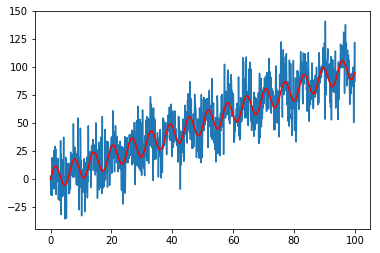

In [51]:
pylab.plot(x,y)
pylab.plot(x,b,'-r')

In [70]:
c = ndimage.gaussian_filter1d(y,20)

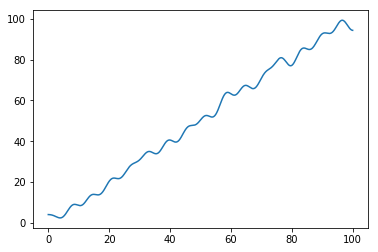

In [71]:
pylab.plot(x,c)
#pylab.plot(x,b,'-r')

In [72]:
# Param: serie OBJ, serie corregida/nueva cortada
def rmsen(obj,cor):
    
    if(type(obj) != list) and (type(obj) != numpy.ndarray):
    
        nom_ener_obj = list(obj)[-1]
        nom_ener_cor = list(cor)[-1]

        n = len(cor)
        resta = []
        i_min = cor.first_valid_index() 

        for i in range(n):
            x_obj = obj[nom_ener_obj][i]
            x_cor = cor[nom_ener_cor][i+i_min]

            x = (x_obj - x_cor)**2

            resta.append(x)

        error = np.sqrt((1/n)*sum(resta))/(np.max(obj[nom_ener_obj]) - np.min(obj[nom_ener_obj]))
        
    else:

        n = len(cor)
        resta = [] 

        for i in range(n):
            x_obj = obj[i]
            x_cor = cor[i]

            x = (x_obj - x_cor)**2

            resta.append(x)

        error = np.sqrt((1/n)*sum(resta))/(np.max(obj) - np.min(obj))
        
    print("El error RMSEn es: {0:.3f}%".format(error*100))

    return error     

In [73]:
er_viejo = rmsen(b,y)
er_nuevo = rmsen(b,c)

El error RMSEn es: 13.716%
El error RMSEn es: 5.560%
